# Part 4- A/B Testing
1. Using “AB_Test” sheet in the shared excel file, what is the possible metric you can create for A/B testing excluding no. of clicks and no. of visitors. (Any derived metric from the given no.of clicks and visitors)
2. Perform an AB testing to find which variation whether control or treatment is better.

Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  4.1 Using “AB_Test” sheet in the shared excel file, what is the possible metric you can create for A/B testing excluding no. of clicks and no. of visitors. (Any derived metric from the given no.of clicks and visitors )



Load the data

In [2]:
# Reading the dataset
df = pd.read_excel("../data/assignment.xlsx", sheet_name="AB_Test")

# Displaying the data
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


## Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### Check Missing values

In [3]:
df.isna().sum()

Date          0
Address       0
Variations    0
DeviceType    0
Clicks        0
Visitors      0
dtype: int64

There are no missing values in the data set

### Check Duplicates



In [4]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### Check Data Types



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18099 non-null  datetime64[ns]
 1   Address     18099 non-null  object        
 2   Variations  18099 non-null  object        
 3   DeviceType  18099 non-null  object        
 4   Clicks      18099 non-null  int64         
 5   Visitors    18099 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB


### Check number of unique values in each column



In [6]:
df.nunique()

Date            18
Address        211
Variations       2
DeviceType       4
Clicks         722
Visitors      1705
dtype: int64

### Check Statistics of Dataset



In [7]:
df.describe()

,Clicks,Visitors
count,18099.000000,18099.000000
mean,55.521023,479.477485
std,377.760167,5705.466343
min,0.000000,1.000000
25%,0.000000,3.000000
50%,2.000000,13.000000
75%,12.000000,79.000000
max,11190.000000,211849.000000


In [79]:
# Displayng the data
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


Checking the distribution of Data

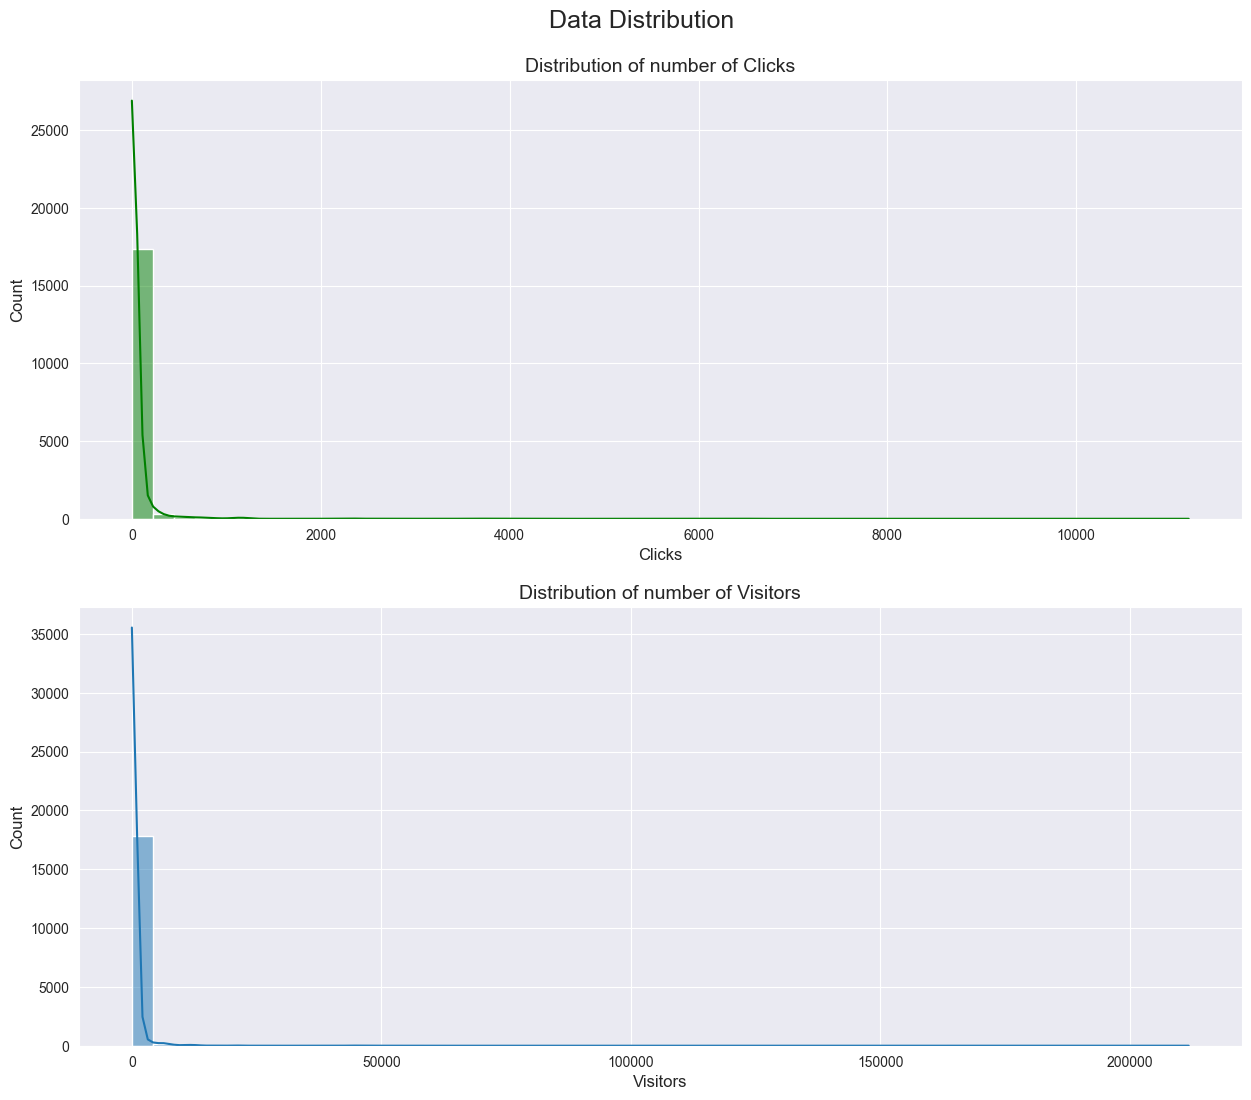

In [137]:
# Styling the plot
sns.set_style("darkgrid")

# Creating subplots
plt.subplots(2,1, figsize=(15,7))

# Checking distribution of "Clicks"
plt.subplot(211)
sns.histplot(df["Clicks"], bins=50, kde=True, color="green")
plt.title("Distribution of number of Clicks", fontsize=14)
plt.xlabel("Clicks",fontsize=12)
plt.ylabel("Count",fontsize=12)

# Checking distribution of "Visitors"
plt.subplot(212)
sns.histplot(df["Visitors"], bins=50, kde=True)
plt.title("Distribution of number of Visitors", fontsize=14)
plt.xlabel("Visitors",fontsize=12)
plt.ylabel("Count",fontsize=12)

plt.subplots_adjust(bottom=-0.5)
plt.suptitle("Data Distribution", fontsize=18)
plt.show()

Insights:  
1. The data for both, "Visitors" and "Clicks" is extremely right skewed.
2. The scale for both the values are different but the distribution looks similar for both.

Creating the new metric for evaluation purpose using the Clicks and Visitors data.  
>We create "Interaction Rate" by dividing Number of Clicks by Number of Visitors. This shows us the rate of visitors interacting with our webpages.

In [138]:
# Dropping irrelevant columns
filtered_df = df.drop(columns=["DeviceType", "Address"])

# Grouping the data based on Variations and Date and summing all the values
filtered_df = filtered_df.groupby(by=["Variations", "Date"]).sum()

# Creating new metric Interaction Rate using [no. of Clicks/no. of Visitors]
filtered_df["Interaction Rate"] = filtered_df["Clicks"] / filtered_df["Visitors"]

# Displaying the data
filtered_df

Clicks  Visitors  Interaction Rate
Variations Date                                          
Control    2023-03-29   50405    498197          0.101175
           2023-03-30   46887    453442          0.103402
           2023-03-31   47251    482210          0.097988
           2023-04-01   34902    374771          0.093129
           2023-04-02   34312    362153          0.094744
           2023-04-03   56714    501013          0.113199
           2023-04-04   55928    482629          0.115882
           2023-04-05   55635    472301          0.117796
           2023-04-06   43667    446805          0.097732
           2023-04-07   40382    411603          0.098109
           2023-04-08   31754    325591          0.097527
           2023-04-09   27950    292751          0.095474
           2023-04-10   53197    471079          0.112926
           2023-04-11   53369    471827          0.113111
           2023-04-12   42855    460841          0.092993
           2023-04-13   42300    457195          0.092521
           2023-04-14   48332    477206          0.101281
           2023-04-15   35857    369447          0.097056
Treatment  2023-03-29   13231     54874          0.241116
           2023-03-30   12682     50791          0.249690
           2023-03-31   12861     53446          0.240635
           2023-04-01    8939     41562          0.215076
           2023-04-02    8413     40335          0.208578
           2023-04-03   14527     55449          0.261988
           2023-04-04   13522     53445          0.253008
           2023-04-05   13244     51924          0.255065
           2023-04-06   11607     49561          0.234196
           2023-04-07   10446     45374          0.230220
           2023-04-08    7288     36044          0.202197
           2023-04-09    6397     32312          0.197976
           2023-04-10   13300     52063          0.255460
           2023-04-11   13104     52799          0.248187
           2023-04-12   11665     51139          0.228104
           2023-04-13   11382     51121          0.222648
           2023-04-14   12225     53474          0.228616
           2023-04-15    8345     41289          0.202112

###  4.2 Perform an AB testing to find which variation whether control or treatment is better.

Creating pivot table to get relevant data for visualization.

In [220]:
# Creating pivot table from previous dataframe
testing_df = filtered_df.reset_index().pivot_table(index="Date", columns="Variations", values="Interaction Rate")

# Displaying the data
testing_df

Variations,Control,Treatment
Date,,
2023-03-29,0.101175,0.241116
2023-03-30,0.103402,0.249690
2023-03-31,0.097988,0.240635
2023-04-01,0.093129,0.215076
2023-04-02,0.094744,0.208578
2023-04-03,0.113199,0.261988
2023-04-04,0.115882,0.253008
2023-04-05,0.117796,0.255065
2023-04-06,0.097732,0.234196


Counting the sample size for Control and Treatment Category

In [223]:
# Counting the rows based on variation
sample_size_df = df.groupby("Variations").count()

# Creating new column with the sample size
sample_size_df["Number of Instances"] = sample_size_df["Date"]
sample_size_df = sample_size_df["Number of Instances"]

# Displying the data
sample_size_df

Variations
Control      10547
Treatment     7552
Name: Number of Instances, dtype: int64

Visualizing the data

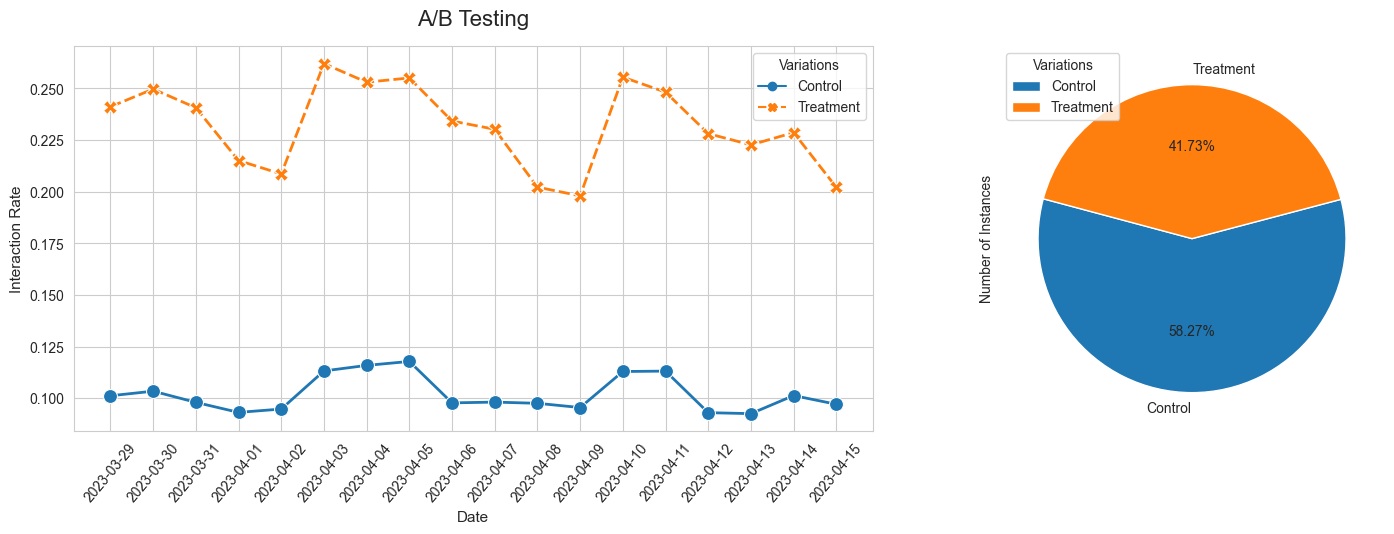

In [282]:
# Setting plot parameters
plt.subplots(1,2, figsize=(17,5),  gridspec_kw={'width_ratios': [2, 1]})
sns.set_style("whitegrid")

# Creating line plot for comparision of variations
plt.subplot(121)
sns.lineplot(testing_df, markers=True, linewidth=2, markersize=10)

# Setting graph descriptions
plt.xlabel("Date", fontsize=11)
plt.ylabel("Interaction Rate", fontsize=11)
plt.title("A/B Testing", fontsize=16, pad=15)
plt.xticks(testing_df.reset_index()["Date"],rotation=50)


# Creating distribution of samples for each variation
plt.subplot(122)
sample_size_df.plot(kind="pie", 
                    autopct="%.2f%%", 
                    startangle=165)
plt.legend(title="Variations", loc="upper left")

plt.show()